In [ ]:
# !chmod +x run_experiment.sh
# !./run_experiment.sh

In [53]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# my files
from models import DenseGCNGRU, GRU_only, GCNGRU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [129]:
checkpoint_dict_list = []
for root, dirs, files in os.walk('./checkpoints'): 
    for name in files: 
        path = os.path.join(root, name)
        checkpoint_dict = torch.load(path)
        new_dict = checkpoint_dict.copy()
        new_dict['model'] = name.split('_')[0]
        new_dict['path'] = path
        new_dict['forecasting_horizon'] = name.split('_')[-2]
        new_dict['dataset'] = name.split('_')[-3]
        if new_dict['dataset'] == '2023': 
            new_dict['dataset'] = 'STADIUM_2023'
        del new_dict['model_state_dict']
        del new_dict['optimizer_state_dict']
        checkpoint_dict_list.append(new_dict)
results_df = pd.DataFrame(checkpoint_dict_list)
for k in ['forecasting_horizon', 'test_mae', 'test_mse']:
    results_df[k] = pd.to_numeric(results_df[k])
results_df.rename({})
results_df.head(3)

,epoch,lr,train_epoch_losses,val_epoch_losses,test_mse,test_mae,model,path,forecasting_horizon,dataset
0,39,0.001,"[0.546831165978668, 0.4396056037977201, 0.4244...",[],0.221994,0.332421,GCNGRU,./checkpoints/GCNGRU_GCS_120_steps.pt,120,GCS
1,39,0.001,"[0.40782534966775036, 0.27550753964743485, 0.2...",[],0.078123,0.205895,DenseGCNGRU,./checkpoints/DenseGCNGRU_GCS_120_steps.pt,120,GCS
2,39,0.001,"[0.9753498976880853, 0.9572571028362621, 0.606...",[],0.298898,0.353797,GRU,./checkpoints/GRU_only_SEQ_20_steps.pt,20,SEQ


In [130]:
replacements = {
    'DenseGCNGRU': 'Dense-GCN-GRU',
    'GCNGRU': 'GCN-GRU',
    'STADIUM_2023': 'Stadium'
}

results_df = results_df.replace(replacements, regex=True)

In [131]:
results_df[['forecasting_horizon', 'dataset','model','test_mse','test_mae']].to_csv('results_out.csv')

In [132]:
results_df.query('forecasting_horizon==20')[['dataset','model','test_mse','test_mae']].sort_values(['dataset', 'model'])

,dataset,model,test_mse,test_mae
7,GCS,Dense-GCN-GRU,0.090917,0.210042
14,GCS,GCN-GRU,0.260004,0.360371
27,GCS,GRU,0.114267,0.229439
33,SEQ,Dense-GCN-GRU,0.246507,0.333288
10,SEQ,GCN-GRU,0.763934,0.627037
2,SEQ,GRU,0.298898,0.353797
20,Stadium,Dense-GCN-GRU,0.033642,0.129742
26,Stadium,GCN-GRU,0.076488,0.197365
17,Stadium,GRU,0.040549,0.142259


In [133]:
results_df.query('forecasting_horizon==20')[['dataset','model','test_mse','test_mae']].sort_values(['dataset', 'model']).groupby('model').agg({'test_mse': 'mean', 'test_mae': 'mean'})

,test_mse,test_mae
model,,
Dense-GCN-GRU,0.123689,0.224357
GCN-GRU,0.366809,0.394924
GRU,0.151238,0.241832


In [134]:
results_df.query('forecasting_horizon==20')[['dataset','model','test_mse','test_mae']].sort_values(['dataset', 'model']).pivot(index='dataset', columns='model', values='test_mse')

model,Dense-GCN-GRU,GCN-GRU,GRU
dataset,,,
GCS,0.090917,0.260004,0.114267
SEQ,0.246507,0.763934,0.298898
Stadium,0.033642,0.076488,0.040549


In [135]:
results_df.query('forecasting_horizon==240')[['dataset','model','test_mse','test_mae']].sort_values(['dataset', 'model'])

,dataset,model,test_mse,test_mae
11,GCS,Dense-GCN-GRU,0.092426,0.219488
18,GCS,GCN-GRU,0.225523,0.333851
30,GCS,GRU,0.157527,0.284396
24,SEQ,Dense-GCN-GRU,0.336476,0.409502
9,SEQ,GCN-GRU,0.782397,0.644679
4,SEQ,GRU,0.965484,0.771505
16,Stadium,Dense-GCN-GRU,0.035781,0.140002
34,Stadium,GCN-GRU,0.047798,0.160320
23,Stadium,GRU,0.077680,0.201283


In [136]:
results_df.query('forecasting_horizon==240')[['dataset','model','test_mse','test_mae']].sort_values(['dataset', 'model']).groupby('model').agg({'test_mse': 'mean', 'test_mae': 'mean'})

,test_mse,test_mae
model,,
Dense-GCN-GRU,0.154894,0.256331
GCN-GRU,0.351906,0.379617
GRU,0.400231,0.419061


In [137]:
results_df.query('forecasting_horizon==240')[['dataset','model','test_mse','test_mae']].sort_values(['dataset', 'model']).pivot(index='dataset', columns='model', values='test_mse')

model,Dense-GCN-GRU,GCN-GRU,GRU
dataset,,,
GCS,0.092426,0.225523,0.157527
SEQ,0.336476,0.782397,0.965484
Stadium,0.035781,0.047798,0.077680


# Table & Plot 1: GCS results

In [123]:
gcs_results = results_df.query('dataset=="GCS"')[['forecasting_horizon','model','test_mse','test_mae',]].sort_values(by=['forecasting_horizon','model'])
gcs_results.to_markdown(index='False')

'|   forecasting_horizon | model         |   test_mse |   test_mae |\n|----------------------:|:--------------|-----------:|-----------:|\n|                    20 | Dense-GCN-GRU |  0.0909171 |   0.210042 |\n|                    20 | GCN-GRU       |  0.260004  |   0.360371 |\n|                    20 | GRU           |  0.114267  |   0.229439 |\n|                    60 | Dense-GCN-GRU |  0.0870501 |   0.212329 |\n|                    60 | GCN-GRU       |  0.255839  |   0.353357 |\n|                    60 | GRU           |  0.176345  |   0.293152 |\n|                   120 | Dense-GCN-GRU |  0.078123  |   0.205895 |\n|                   120 | GCN-GRU       |  0.221994  |   0.332421 |\n|                   120 | GRU           |  0.1384    |   0.268725 |\n|                   240 | Dense-GCN-GRU |  0.0924262 |   0.219488 |\n|                   240 | GCN-GRU       |  0.225523  |   0.333851 |\n|                   240 | GRU           |  0.157527  |   0.284396 |'

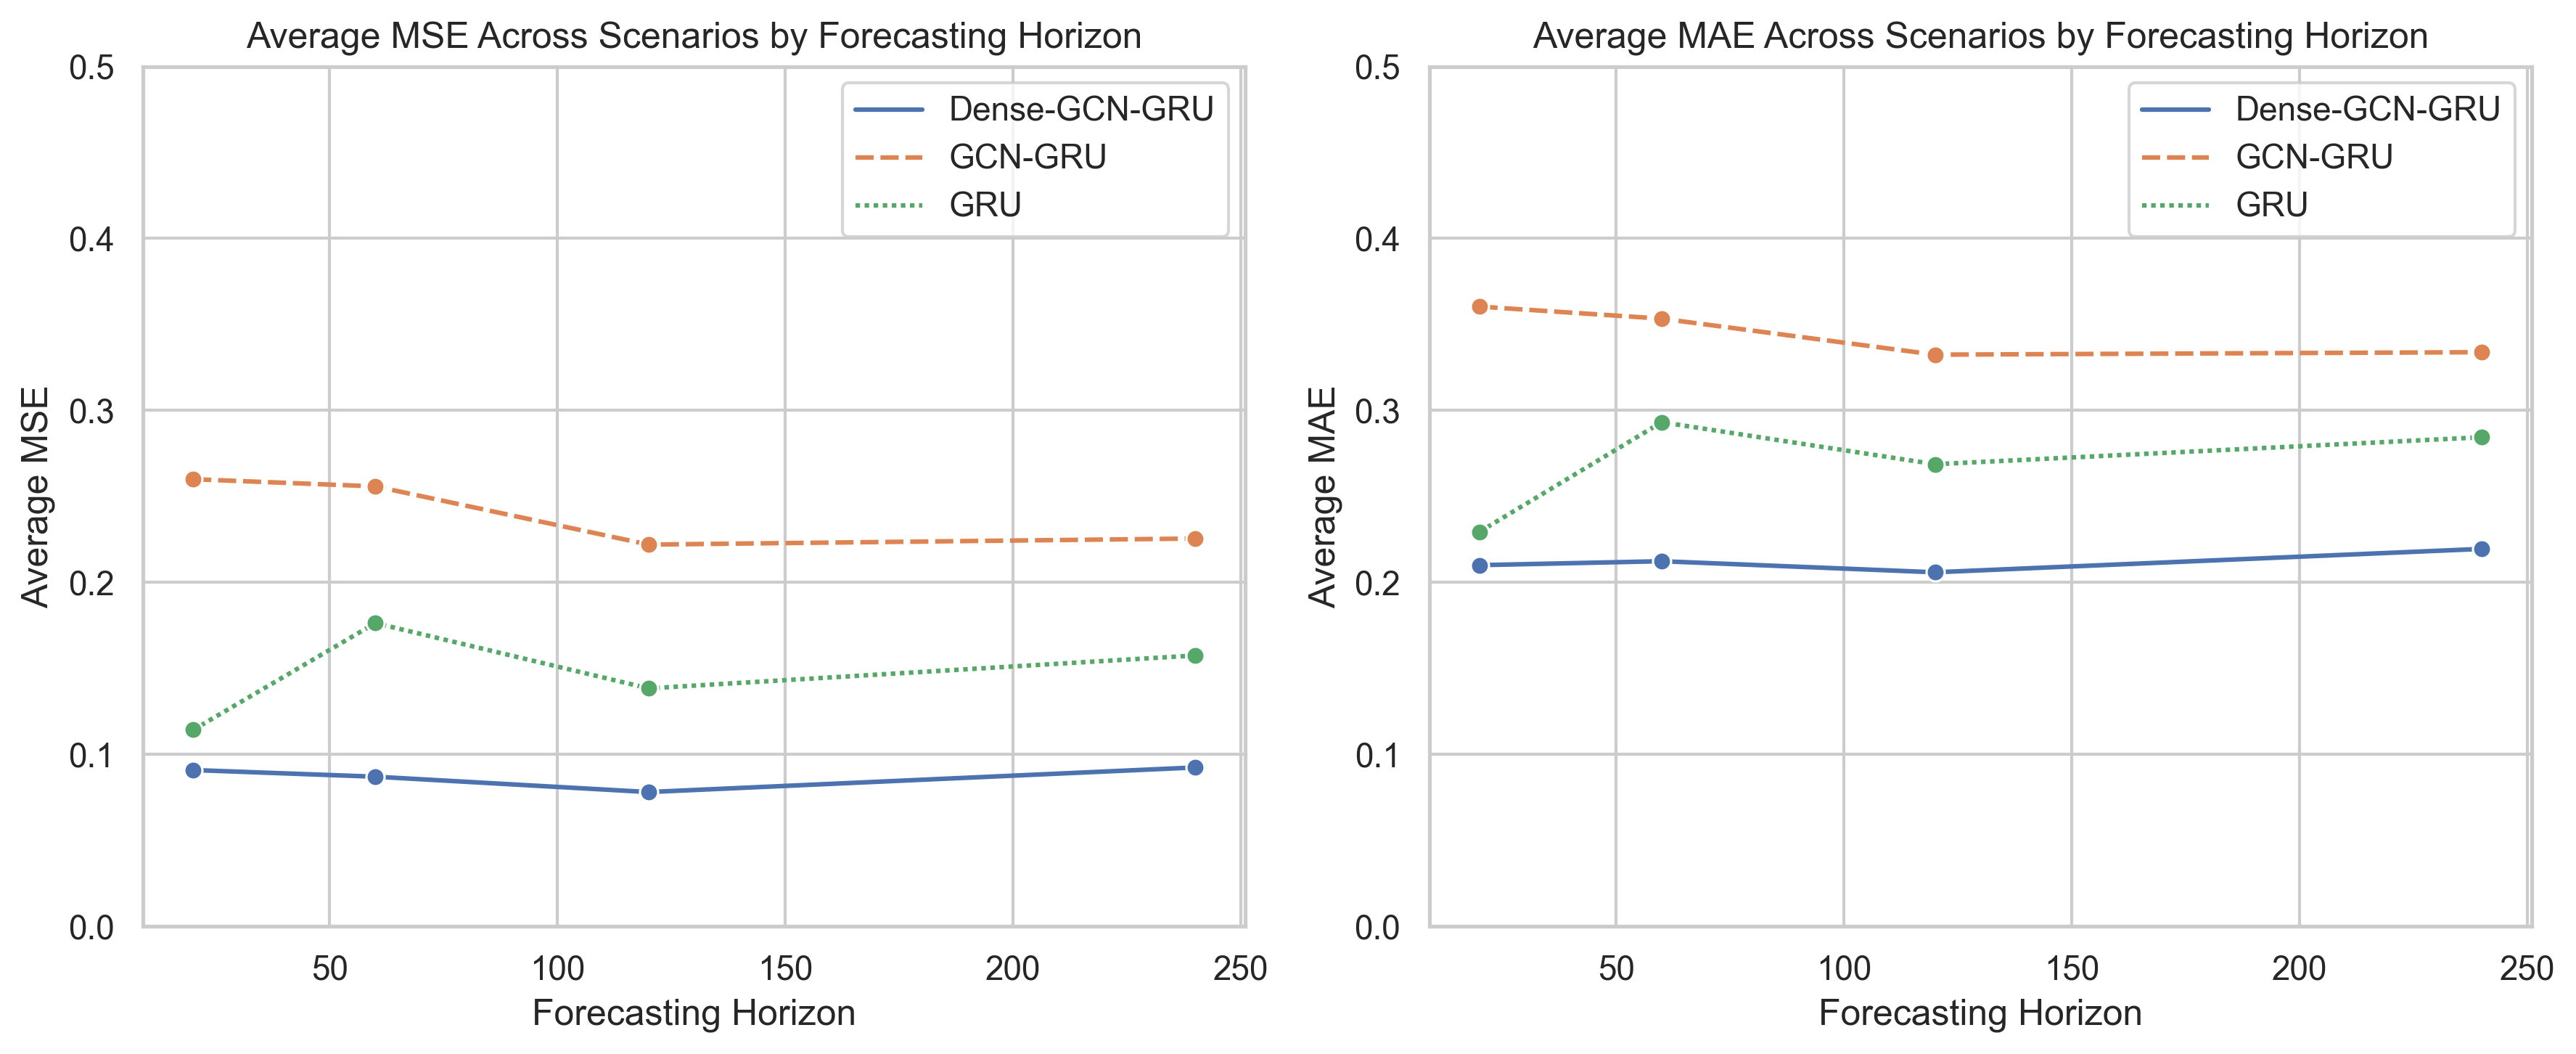

In [127]:
# Pivot the data for easier plotting
mse_pivot = gcs_results.pivot("forecasting_horizon", "model", "test_mse")
mae_pivot = gcs_results.pivot("forecasting_horizon", "model", "test_mae")

# Line plot for MSE
plt.figure(figsize=(12, 5),dpi=300)
plt.subplot(1, 2, 1)
sns.lineplot(data=mse_pivot, marker='o')
plt.title('Average MSE Across Scenarios by Forecasting Horizon')
plt.ylabel('Average MSE')
plt.xlabel('Forecasting Horizon')
plt.legend(loc='upper right')
plt.ylim((0,0.5))

# Line plot for MAE
plt.subplot(1, 2, 2)
sns.lineplot(data=mae_pivot, marker='o')
plt.title('Average MAE Across Scenarios by Forecasting Horizon')
plt.ylabel('Average MAE')
plt.xlabel('Forecasting Horizon')
plt.legend(loc='upper right')
plt.ylim((0,0.5))

# Adjust layout
plt.tight_layout()
plt.show()

# Table & Plot 2: MSE and MAE at 20 and 240 steps across Campus Crowd data subsets

In [155]:
cc_results = results_df.query('dataset.isin(["Stadium", "SEQ"])')[['dataset','forecasting_horizon','model','test_mse','test_mae',]].sort_values(by=['dataset','forecasting_horizon','model'])
# cc_results.to_markdown(index='False')
cc_results

,dataset,forecasting_horizon,model,test_mse,test_mae
33,SEQ,20,Dense-GCN-GRU,0.246507,0.333288
10,SEQ,20,GCN-GRU,0.763934,0.627037
2,SEQ,20,GRU,0.298898,0.353797
22,SEQ,60,Dense-GCN-GRU,0.245608,0.329055
5,SEQ,60,GCN-GRU,0.494309,0.460872
19,SEQ,60,GRU,0.363938,0.412361
6,SEQ,120,Dense-GCN-GRU,0.281856,0.350016
13,SEQ,120,GCN-GRU,0.414673,0.433164
28,SEQ,120,GRU,0.515549,0.476942
24,SEQ,240,Dense-GCN-GRU,0.336476,0.409502


In [156]:
horizon_20_data = cc_results.query('forecasting_horizon==20')[['dataset','model','test_mse','test_mae']].sort_values(by=['dataset','model'])

# Grouping by model and dataset, then calculating the mean MSE and MAE for horizon 20
model_dataset_performance_horizon_20 = horizon_20_data.groupby(['model', 'dataset'])[['test_mse', 'test_mae']].mean().reset_index()

# Sorting the data for better visualization
model_dataset_performance_horizon_20_sorted = model_dataset_performance_horizon_20.sort_values(by=['dataset','model'])

model_dataset_performance_horizon_20_sorted.round(3)

,model,dataset,test_mse,test_mae
0,Dense-GCN-GRU,SEQ,0.247,0.333
2,GCN-GRU,SEQ,0.764,0.627
4,GRU,SEQ,0.299,0.354
1,Dense-GCN-GRU,Stadium,0.034,0.130
3,GCN-GRU,Stadium,0.076,0.197
5,GRU,Stadium,0.041,0.142


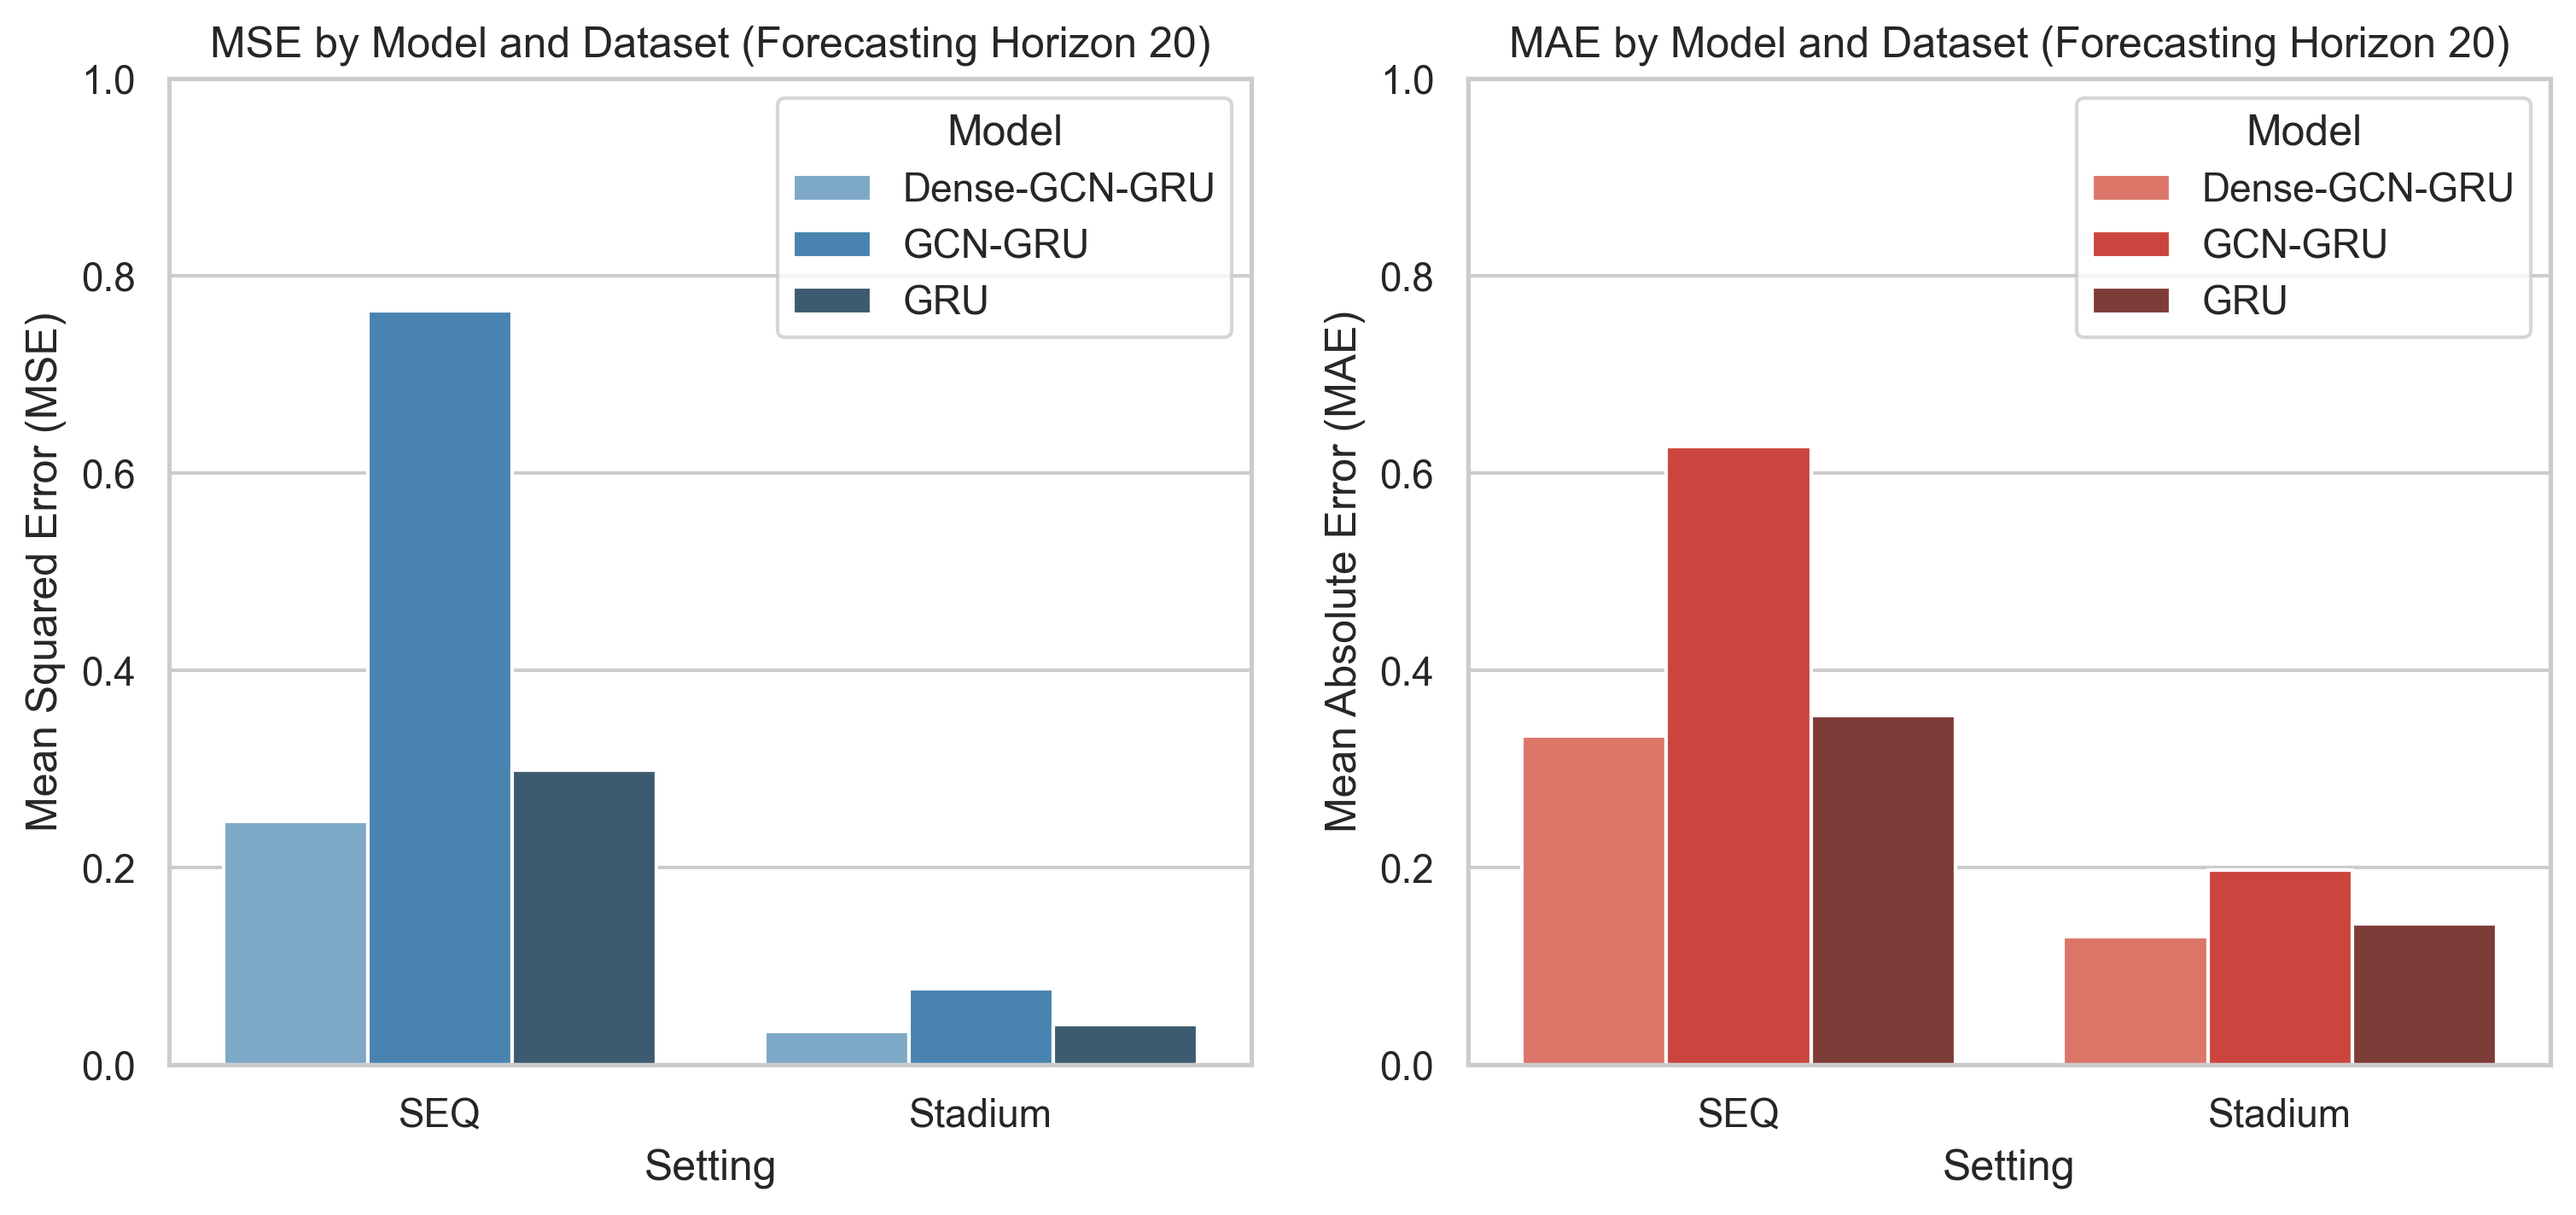

In [158]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram Plot for MSE
plt.figure(figsize=(12, 5),dpi=300)
plt.subplot(1, 2, 1)
sns.barplot(x='dataset', y='test_mse', hue='model', data=horizon_20_data, palette='Blues_d')
plt.title('MSE by Model and Dataset (Forecasting Horizon 20)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Setting')
plt.legend(title='Model')
plt.ylim((0,1))

# Histogram Plot for MAE
plt.subplot(1, 2, 2)
sns.barplot(x='dataset', y='test_mae', hue='model', data=horizon_20_data, palette='Reds_d')
plt.title('MAE by Model and Dataset (Forecasting Horizon 20)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Setting')
plt.legend(title='Model')
plt.ylim((0,1))
plt.show()

In [159]:
horizon_240_data = cc_results.query('forecasting_horizon==240')[['dataset','model','test_mse','test_mae']].sort_values(by=['dataset','model'])

# Grouping by model and dataset, then calculating the mean MSE and MAE for horizon 240
model_dataset_performance_horizon_240 = horizon_240_data.groupby(['model', 'dataset'])[['test_mse', 'test_mae']].mean().reset_index()

# Sorting the data for better visualization
model_dataset_performance_horizon_240_sorted = model_dataset_performance_horizon_240.sort_values(by=['dataset','model'])

model_dataset_performance_horizon_240_sorted.round(3)

,model,dataset,test_mse,test_mae
0,Dense-GCN-GRU,SEQ,0.336,0.410
2,GCN-GRU,SEQ,0.782,0.645
4,GRU,SEQ,0.965,0.772
1,Dense-GCN-GRU,Stadium,0.036,0.140
3,GCN-GRU,Stadium,0.048,0.160
5,GRU,Stadium,0.078,0.201


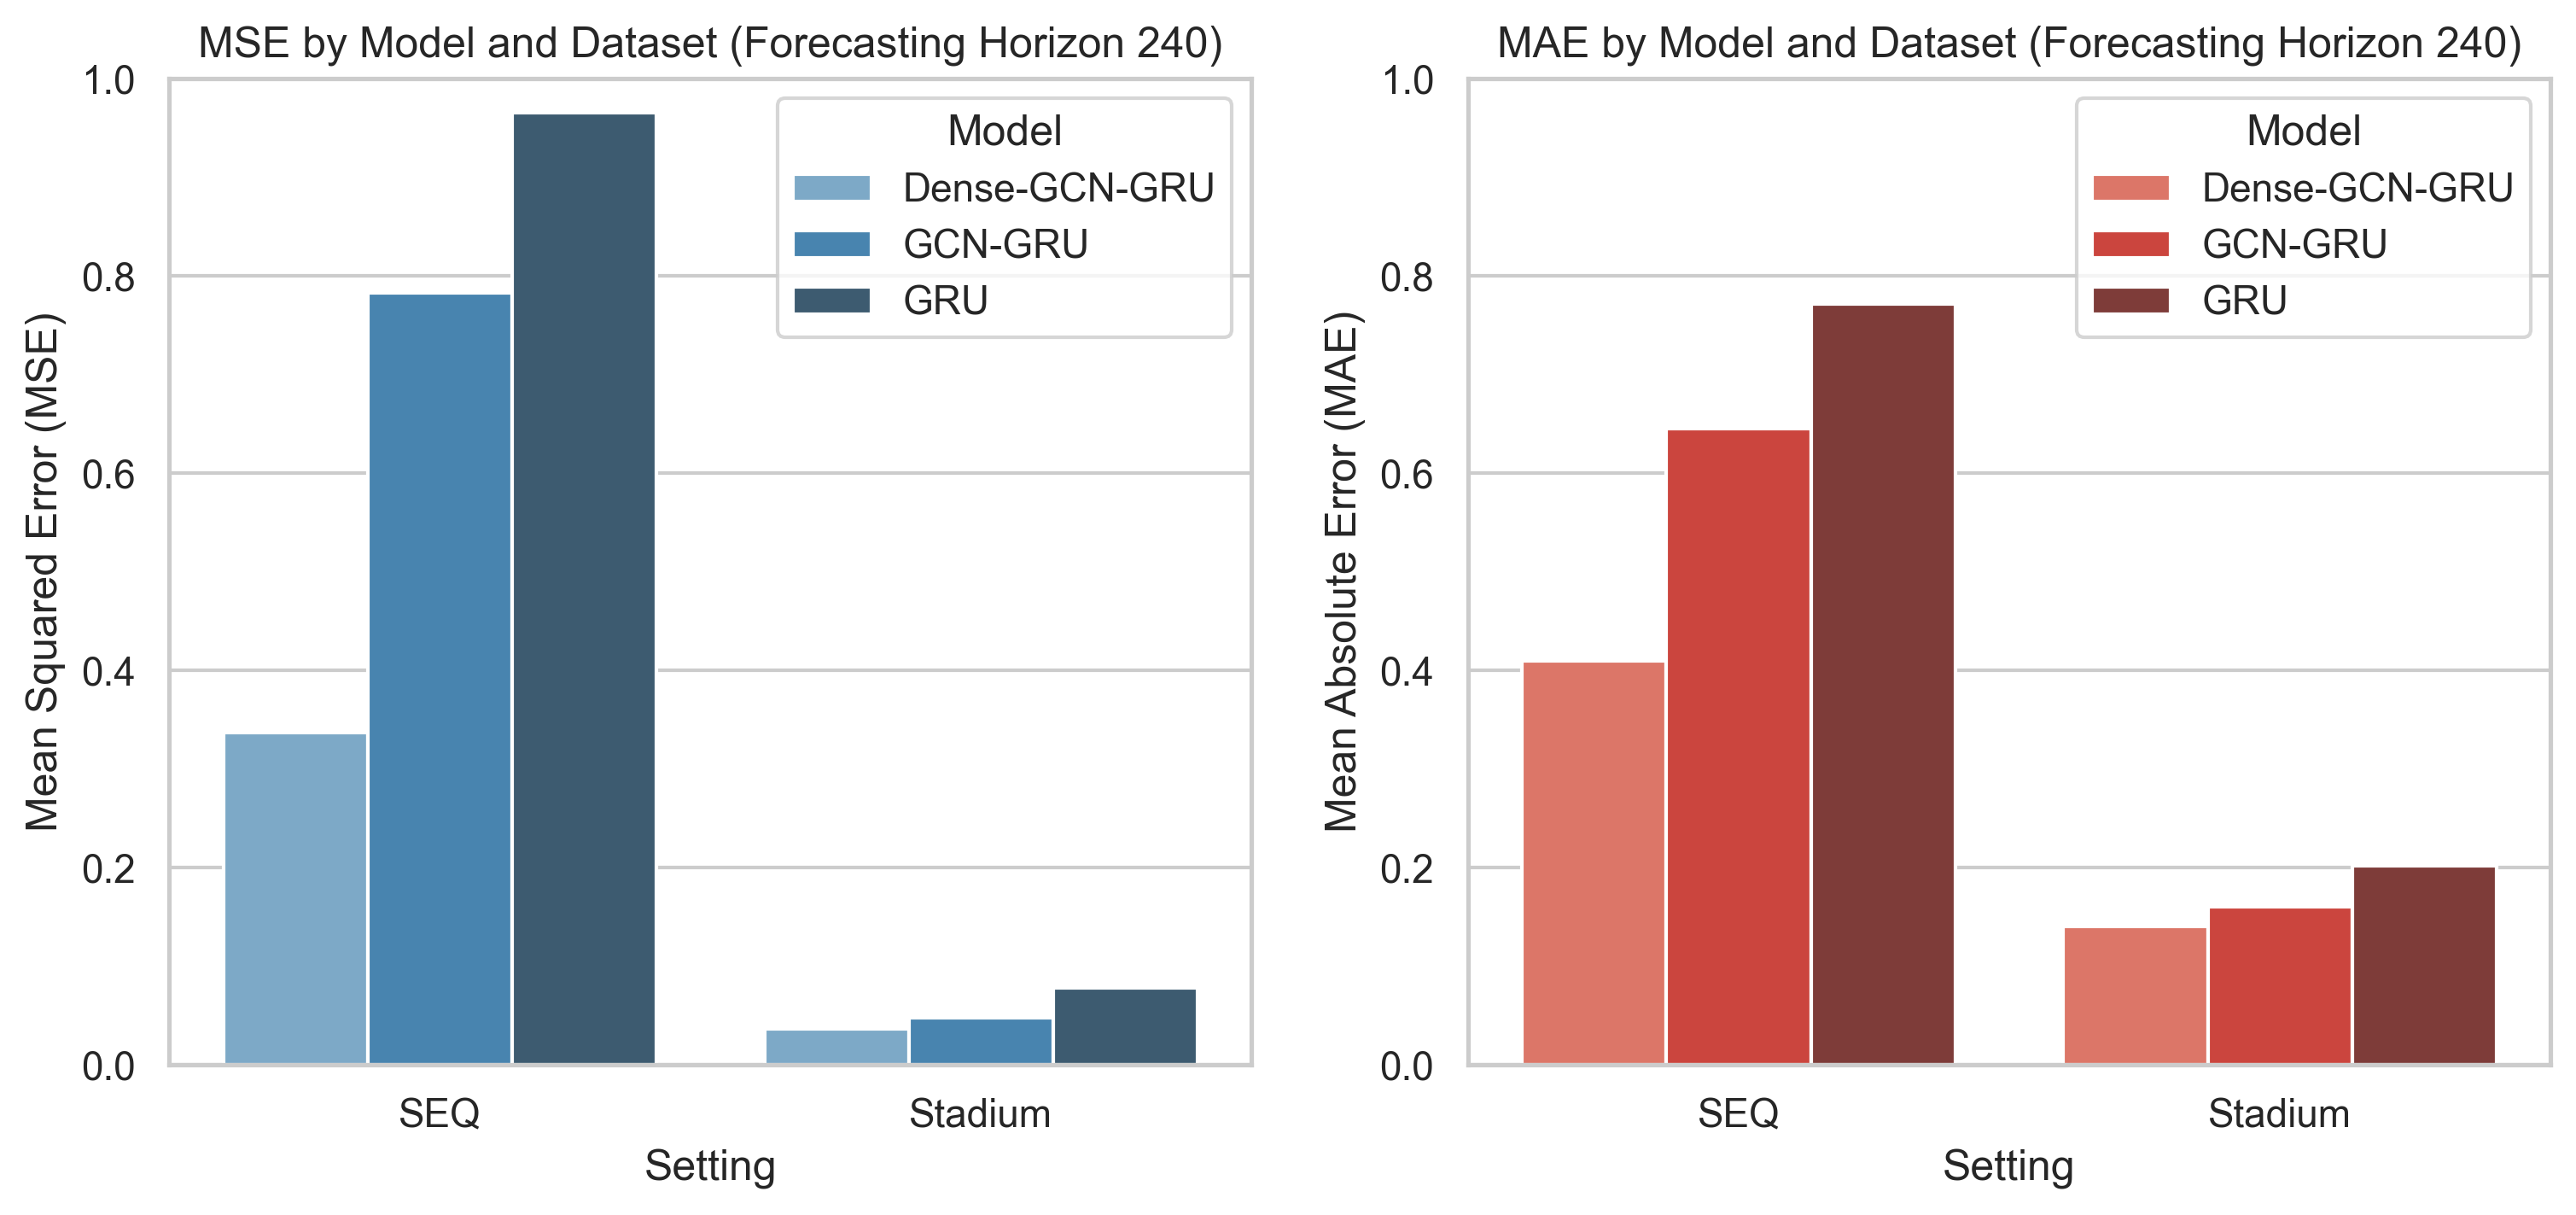

In [160]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram Plot for MSE
plt.figure(figsize=(12, 5),dpi=300)
plt.subplot(1, 2, 1)
sns.barplot(x='dataset', y='test_mse', hue='model', data=horizon_240_data, palette='Blues_d')
plt.title('MSE by Model and Dataset (Forecasting Horizon 240)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Setting')
plt.legend(title='Model')
plt.ylim((0,1))

# Histogram Plot for MAE
plt.subplot(1, 2, 2)
sns.barplot(x='dataset', y='test_mae', hue='model', data=horizon_240_data, palette='Reds_d')
plt.title('MAE by Model and Dataset (Forecasting Horizon 240)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Setting')
plt.legend(title='Model')
plt.ylim((0,1))
plt.show()

# Table & Plot 3: MSE and MAE at various steps, averaged over all data subsets. 

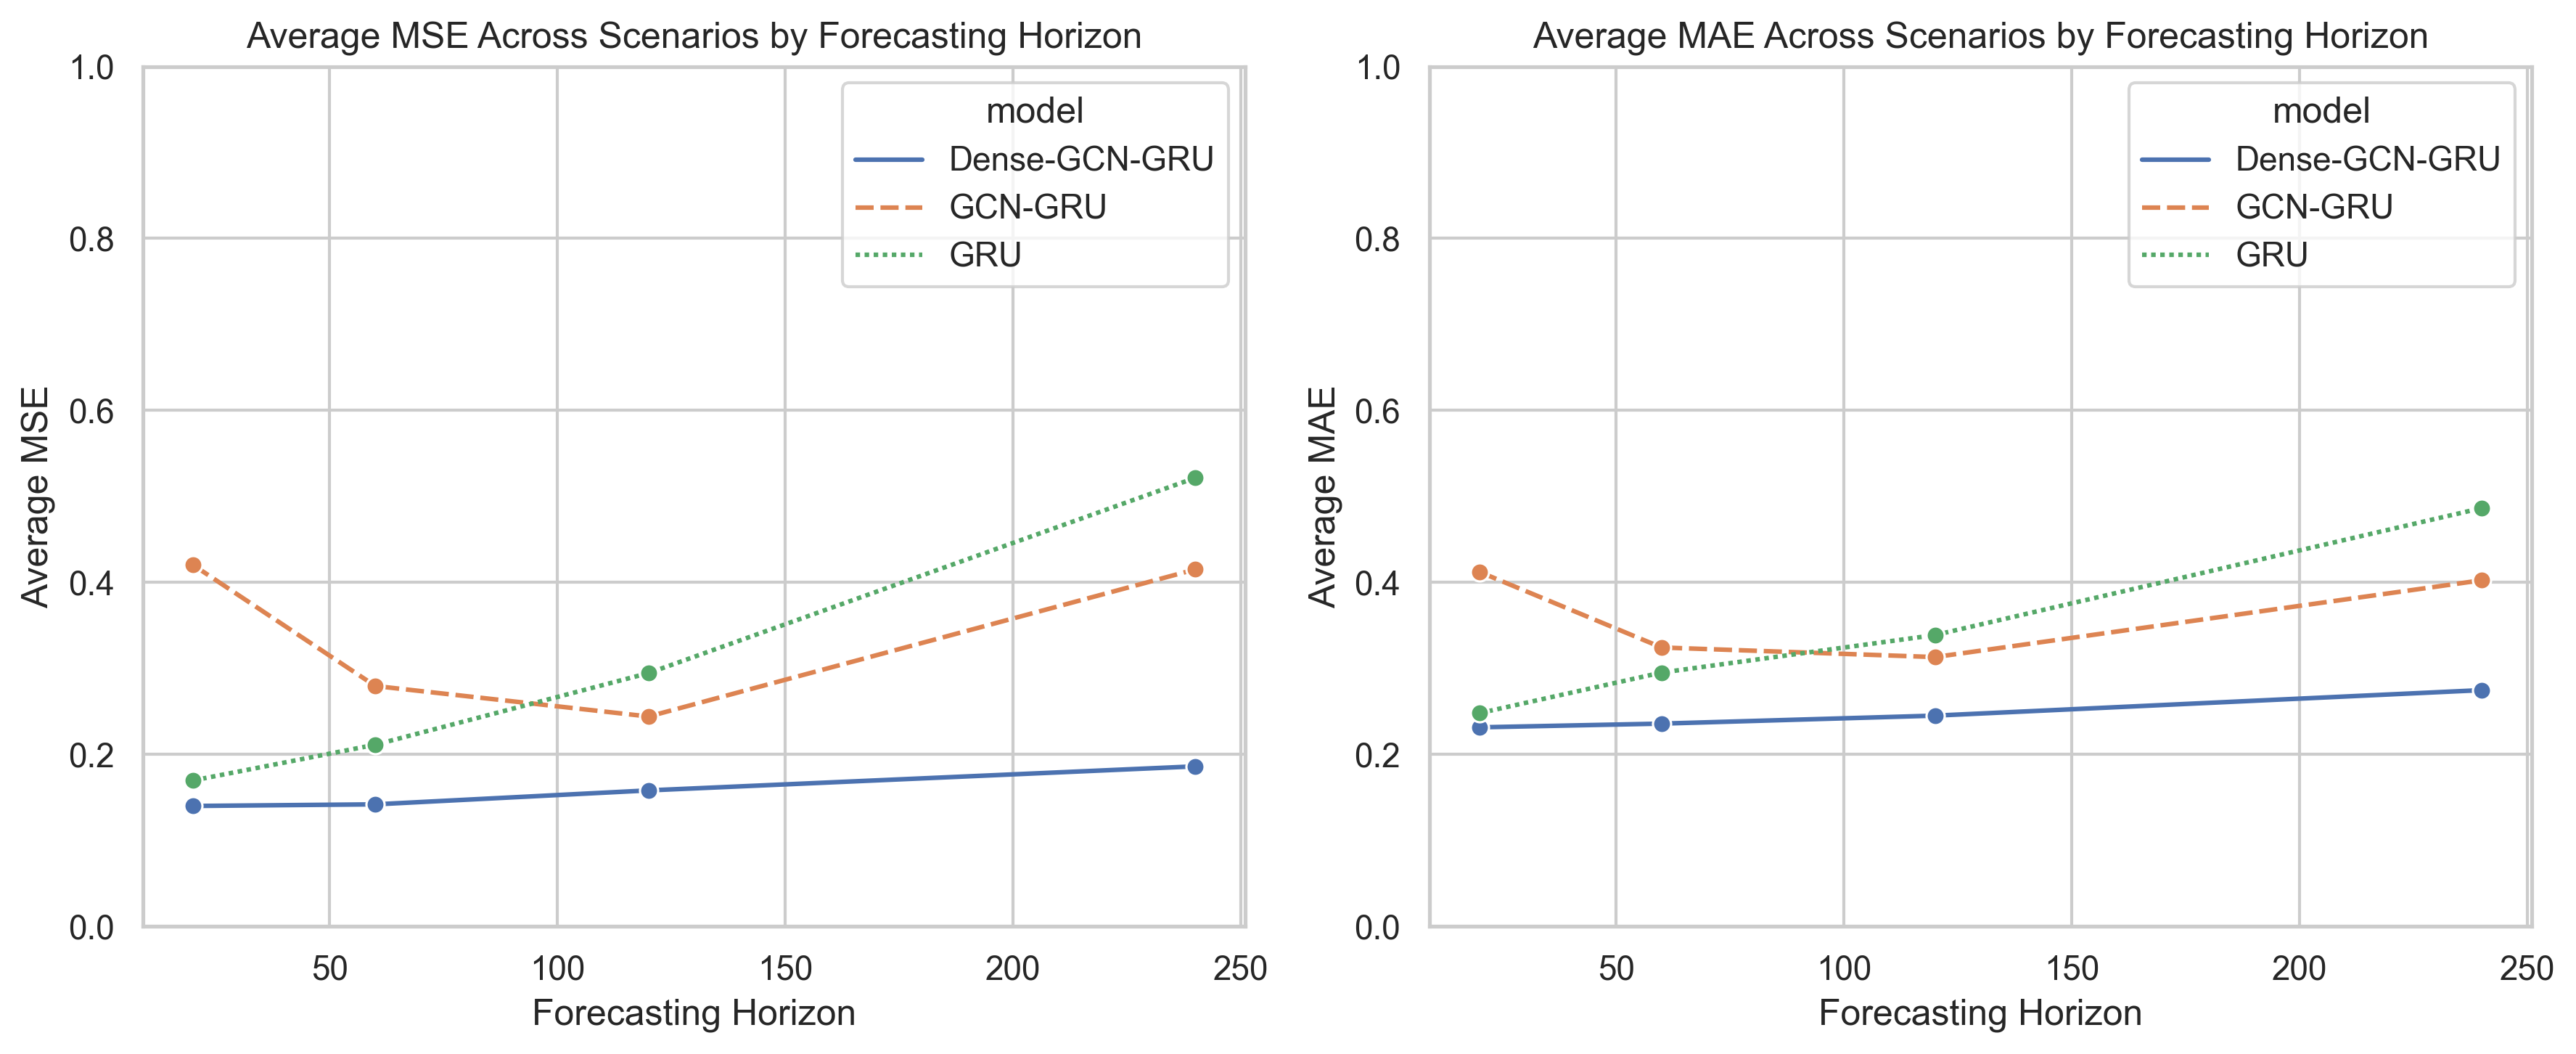

In [161]:
# Averaging MSE and MAE across datasets for each forecasting horizon and model
avg_performance = cc_results.groupby(['forecasting_horizon', 'model']).mean().reset_index()

# Pivot the data for easier plotting
mse_pivot = avg_performance.pivot("forecasting_horizon", "model", "test_mse")
mae_pivot = avg_performance.pivot("forecasting_horizon", "model", "test_mae")

# Line plot for MSE
plt.figure(figsize=(12, 5),dpi=300)
plt.subplot(1, 2, 1)
sns.lineplot(data=mse_pivot, marker='o')
plt.title('Average MSE Across Scenarios by Forecasting Horizon')
plt.ylabel('Average MSE')
plt.xlabel('Forecasting Horizon')
plt.ylim((0,1))

# Line plot for MAE
plt.subplot(1, 2, 2)
sns.lineplot(data=mae_pivot, marker='o')
plt.title('Average MAE Across Scenarios by Forecasting Horizon')
plt.ylabel('Average MAE')
plt.xlabel('Forecasting Horizon')
plt.ylim((0,1))

# Adjust layout
plt.tight_layout()
plt.show()

In [36]:
avg_performance

,forecasting_horizon,model,epoch,lr,test_mse,test_mae
0,20,DenseGCNGRU,39.0,0.001,0.123689,0.224357
1,20,GCNGRU,39.0,0.001,0.366809,0.394924
2,20,GRU,39.0,0.001,0.151238,0.241832
3,60,DenseGCNGRU,39.0,0.001,0.123653,0.227989
4,60,GCNGRU,39.0,0.001,0.271646,0.334012
5,60,GRU,39.0,0.001,0.199657,0.294523
6,120,DenseGCNGRU,39.0,0.001,0.131491,0.232033
7,120,GCNGRU,39.0,0.001,0.236717,0.319605
8,120,GRU,39.0,0.001,0.242538,0.315443
9,240,DenseGCNGRU,39.0,0.001,0.154894,0.256331


# plot for presentation

In [71]:
horizon_20_data['model'].replace('DenseGCNGRU', 'Our Model', inplace=True)
horizon_20_data['model'].replace('GRU', 'Baseline', inplace=True)
horizon_20_data = horizon_20_data[(horizon_20_data['dataset'] != 'GCS') & (horizon_20_data['model'] != 'GCNGRU')]
horizon_20_data

,dataset,model,test_mse,test_mae
33,SEQ,Our Model,0.246507,0.333288
2,SEQ,Baseline,0.298898,0.353797
20,STADIUM_2023,Our Model,0.033642,0.129742
17,STADIUM_2023,Baseline,0.040549,0.142259


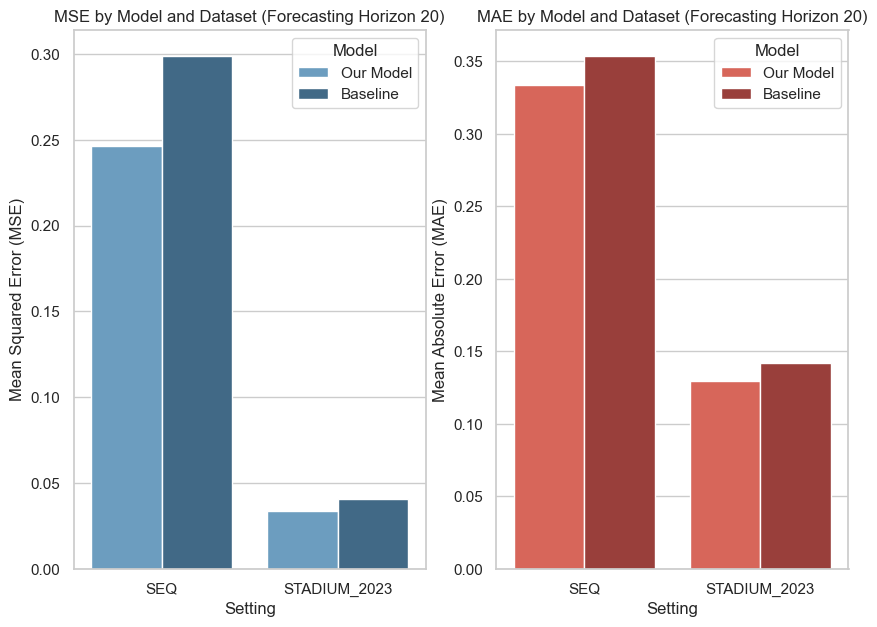

In [78]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram Plot for MSE
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='dataset', y='test_mse', hue='model', data=horizon_20_data, palette='Blues_d')
plt.title('MSE by Model and Dataset (Forecasting Horizon 20)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Setting')
plt.legend(title='Model')

# Histogram Plot for MAE
plt.subplot(1, 2, 2)
sns.barplot(x='dataset', y='test_mae', hue='model', data=horizon_20_data, palette='Reds_d')
plt.title('MAE by Model and Dataset (Forecasting Horizon 20)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Setting')
plt.legend(title='Model')
plt.show()

In [79]:
horizon_240_data['model'].replace('DenseGCNGRU', 'Our Model', inplace=True)
horizon_240_data['model'].replace('GRU', 'Baseline', inplace=True)
horizon_240_data = horizon_240_data[(horizon_240_data['dataset'] != 'GCS') & (horizon_240_data['model'] != 'GCNGRU')]
horizon_240_data

,dataset,model,test_mse,test_mae
24,SEQ,Our Model,0.336476,0.409502
4,SEQ,Baseline,0.965484,0.771505
16,STADIUM_2023,Our Model,0.035781,0.140002
23,STADIUM_2023,Baseline,0.077680,0.201283


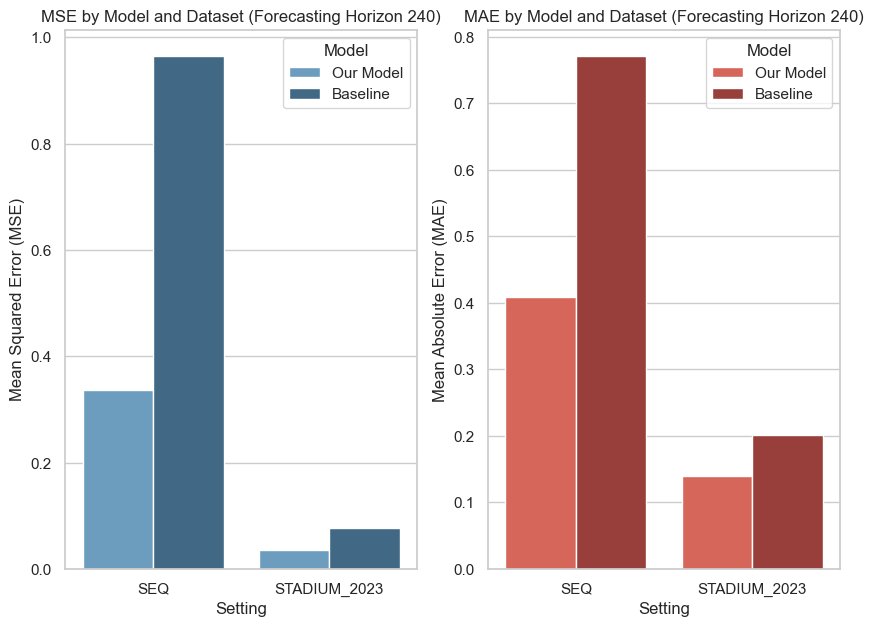

In [81]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram Plot for MSE
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='dataset', y='test_mse', hue='model', data=horizon_240_data, palette='Blues_d')
plt.title('MSE by Model and Dataset (Forecasting Horizon 240)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Setting')
plt.legend(title='Model')

# Histogram Plot for MAE
plt.subplot(1, 2, 2)
sns.barplot(x='dataset', y='test_mae', hue='model', data=horizon_240_data, palette='Reds_d')
plt.title('MAE by Model and Dataset (Forecasting Horizon 240)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Setting')
plt.legend(title='Model')
plt.show()

In [84]:
avg_performance['model'].replace('DenseGCNGRU', 'Our Model', inplace=True)
avg_performance['model'].replace('GRU', 'Baseline', inplace=True)
avg_performance = avg_performance[(avg_performance['model'] != 'GCNGRU')]

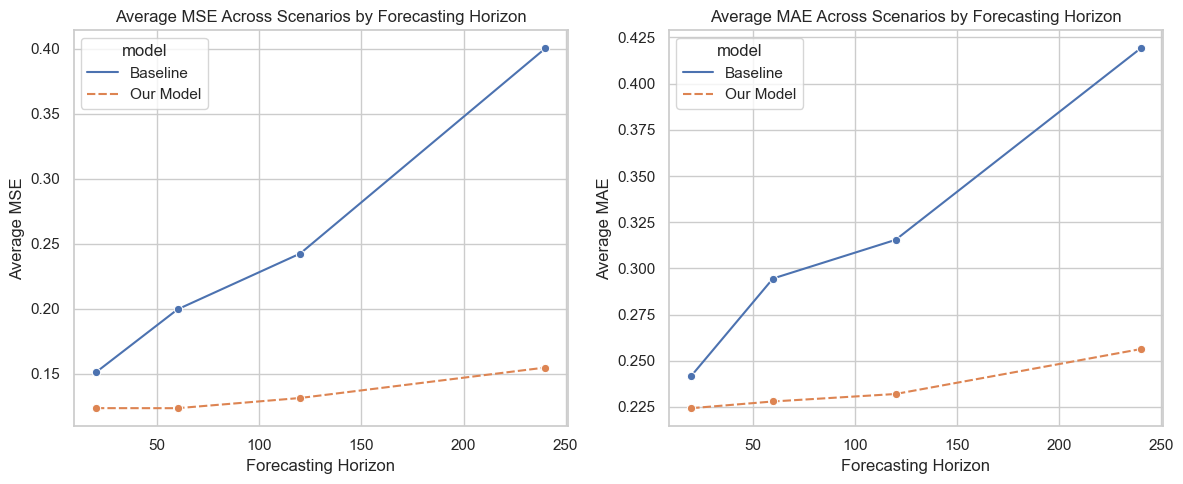

In [85]:

# Pivot the data for easier plotting
mse_pivot = avg_performance.pivot("forecasting_horizon", "model", "test_mse")
mae_pivot = avg_performance.pivot("forecasting_horizon", "model", "test_mae")

# Line plot for MSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=mse_pivot, marker='o')
plt.title('Average MSE Across Scenarios by Forecasting Horizon')
plt.ylabel('Average MSE')
plt.xlabel('Forecasting Horizon')

# Line plot for MAE
plt.subplot(1, 2, 2)
sns.lineplot(data=mae_pivot, marker='o')
plt.title('Average MAE Across Scenarios by Forecasting Horizon')
plt.ylabel('Average MAE')
plt.xlabel('Forecasting Horizon')

# Adjust layout
plt.tight_layout()
plt.show()